# DPConCFil Manual

## Installation and Usage of DPConCFil

In [49]:
# pip install FacetClumps==0.0.9
# pip install DPConCFil==0.0.2

Customized classes and functions

In [2]:
# import DPConCFil

# from DPConCFil.Clump_Class import *
# from DPConCFil.Filament_Class import *
# from DPConCFil import Plot_and_Save_Funs
# from DPConCFil import Profile_Funs

# Or
import sys

sys.path.append('../')
sys.path.append('../DPConCFil_Code/')

from DPConCFil_Code.Clump_Class import *
from DPConCFil_Code.Filament_Class import *
from DPConCFil_Code import Plot_and_Save_Funs
from DPConCFil_Code import Profile_Funs

## The imported dependent packages

Dependencies for the manual

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import astropy.io.fits as fits
from astropy import units as u
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

## The reference of the Example data 

'Example_Filaments_13CO_1.fits' is the $^{13}CO$ ($J = 1-0$) emission line of the Milky Way Imaging Scroll Painting (MWISP) within $17.7^{\circ} \leq l \leq 18.5^{\circ}$, $0^{\circ} \leq b \leq 0.8^{\circ}$ and 5 km s$^{-1}$ $\leq v \leq$ 30 km s$^{-1}$. 

MWISP project is a multi-line survey in $^{12}CO$/$^{13}CO$/$C^{18}O$ along the northern galactic plane with PMO-13.7m telescope.

In [4]:
file_example = 'Example_Filaments_13CO_1'
file_name = "../Example_Files/Data/{}.fits".format(file_example)

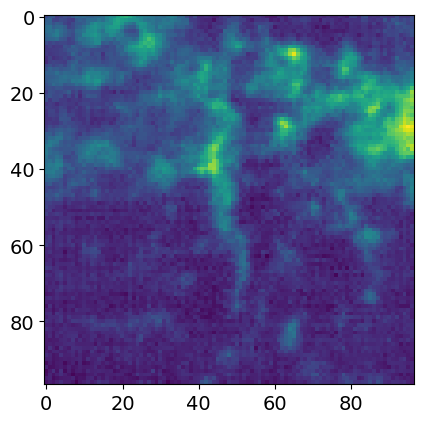

In [5]:
real_data = fits.getdata(file_name)
plt.imshow(real_data.sum(0))
plt.show()

## Calculate the clump information

The parameters of FacetClumps. Please see the introduction of [FacetClumps](https://github.com/JiangYuTS/FacetClumps/blob/master/Examples/Examples_Files_FacetClumps.ipynb) for more details.

In [6]:
SWindow = 3 # [3,5,7]
KBins = 35 # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [9, 4] # [(2+FwhmBeam)**2,3+VeloRes]

header = fits.getheader(file_name)
RMS = header['RMS']
Threshold = 5 * RMS

parameters_FacetClumps = [RMS, Threshold, SWindow, KBins, FwhmBeam, VeloRes, SRecursionLBV]

Construct clump objects. These file names are necessary parameters.

**file_name**: File name.

**mask_name**: Mask name, the file use to store the region information or store the region information. 

**outcat_name**: The file used to store clump table in pixel coordinate system.

**outcat_wcs_name**: The file used to store clump table in WCS coordinate system.

In [7]:
mask_name = '../Example_Files/Clump/mask_{}.fits'.format(file_example)
outcat_name = '../Example_Files/Clump/outcat_{}.csv'.format(file_example)
outcat_wcs_name = '../Example_Files/Clump/outcat_wcs_{}.csv'.format(file_example)

In [8]:
clumpsObj = ClumpInfor(file_name,mask_name,outcat_name,outcat_wcs_name)

### Calculate the clump information from FacetClumps. 

In this case, the parameters of FacetClumps is essential. More clump detection algorithms can also be added to this process. 

The angle of the clumps detected by FacetClumps is obtained by diagonalizing the moment of inertia matrix. For more details, please refer to the article [FacetClumps](https://iopscience.iop.org/article/10.3847/1538-4365/acda89). Performing a two-dimensional single Gaussian fitting on the velocity integrated map of a clump can provide more accurate position and direction information of the clump in spatial direction. 

When 'fit_flag=True', it indicates that the fitting will be used. This will benefit the performance of DPConFil.

In [9]:
clumpsObj.Cal_Infor_From_Mask_Or_Algorithm(mask_or_algorithm='FacetClumps',parameters=parameters_FacetClumps)
clumpsObj.Get_Clumps_Infor(fit_flag = True)

100%|██████████| 39/39 [00:00<00:00, 474.68it/s]


Number: 126
Time: 3.24


100%|██████████| 126/126 [00:00<00:00, 221.01it/s]

Fitting Clumps Time: 0.58


### Calculate the clump information from the mask file 'mask_name'. 

The mask is the region information of clumps, which can be obtained by any clump detection algorithm.

In [10]:
clumpsObj.Cal_Infor_From_Mask_Or_Algorithm(mask_or_algorithm='mask')
clumpsObj.Get_Clumps_Infor(fit_flag = True)    

Number: 126
Time: 0.05


100%|██████████| 126/126 [00:00<00:00, 224.75it/s]

Fitting Clumps Time: 0.57


Plot the original image. If save_path=None, the image will not be saved.

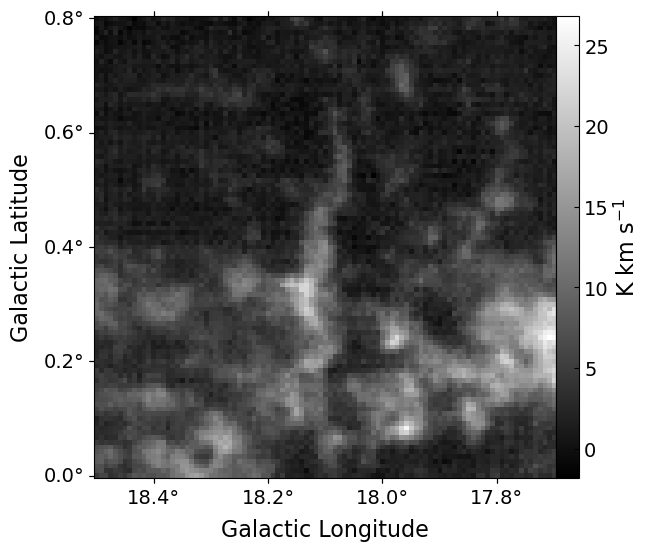

In [11]:
save_path = '../Images/Example_Data.pdf'
Plot_and_Save_Funs.Plot_Origin_Data(clumpsObj,figsize=(8,6),fontsize=16,spacing=12*u.arcmin,save_path=save_path)

Plot the detection results and save the image. 

The total number of clumps is 126, with 88 of them not touching the edge. The red asterisks denote the central position of the clumps, and the red lines denote the direction of the principal axis of the clumps.

In [12]:
edges = clumpsObj.edges
print('Total number:',len(edges))
print('NO edges number:',np.where(edges==0)[0].shape[0])

Total number: 126
NO edges number: 88


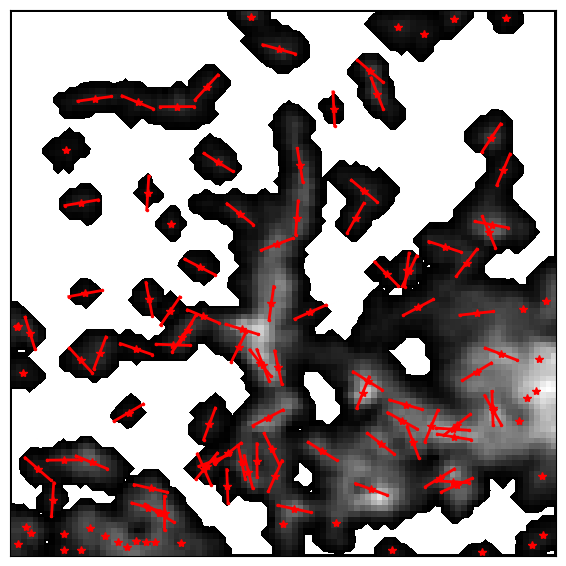

In [13]:
save_path = '../Images/Clumps_Infor.pdf'
Plot_and_Save_Funs.Plot_Clumps_Infor(clumpsObj,figsize=(8,6),line_scale=3,save_path=save_path)

## Input Paremeters of DPConCFil 

**TolAngle**: The angle tolerance that indicates the presence of directional consistency between two neighboring clumps.
    
Default Value: 30 degrees

**TolDistance**: The distance tolerance that indicates the presence of positional consistency between a clump and local filament axis.

Default Value: 4 pixels

**LWRatio**: The minimum aspect ratio of a filament.

Default Value: 2.5

**SkeletonType**: Choose the sketelon analysis method.
    
Values: Morphology, Intensity


**filament_mask_name**: Used to store region information. The index (starts with the number one) of each filament corresponds to the same number in the mask.

**filament_table_pix_name**: Used to store filament table in pixel coordinate system.

**filament_table_wcs_name**: Used to store filament table in WCS coordinate system.

**filament_infor_name**: Used to store filament information by .npz file.

In [14]:
TolAngle = 30
TolDistance = 4
LWRatio = 2.5
SkeletonType = 'Intensity' # Morphology, Intensity

parameters_DPConCFil = [TolAngle,TolDistance,LWRatio]

In [15]:
file_index = 1
file_lines = ['12CO','13CO','C18O']
file_line = file_lines[1]

filament_mask_name = '../Example_Files/Filament/Mask_{}_{}.fits'.format(file_index,file_line)
filament_table_pix_name = '../Example_Files/Filament/Table_Pix_{}_{}.csv'.format(file_index,file_line)
filament_table_wcs_name = '../Example_Files/Filament/Table_WCS_{}_{}.csv'.format(file_index,file_line)
filament_infor_name = '../Example_Files/Filament/Infor_{}_{}'.format(file_index,file_line)

save_files = [filament_mask_name,filament_table_pix_name,filament_table_wcs_name,filament_infor_name]

## DPConCFil: Simplified Process

We demonstrate the simplified process of identifying and analyzing filaments using all the sub-methods of `DPConCFil`. Each sub-method can be applied independently, and then we will show how to use each sub-method. 

Construct filament objects. 

In [16]:
filamentObj = FilamentInfor(clumpsObj,parameters_DPConCFil,save_files,SkeletonType)

By using the function `Filament_Detect`, we can directly obtain information about the connection between filaments and clumps, as well as the regions and tables associated with the filaments, among other things.

In [45]:
filament_infor_all,Filament_Table_Pix,Filament_Table_WCS = filamentObj.Filament_Detect()

related_ids = filament_infor_all['related_ids']
print('Filament Keys:',list(related_ids.keys()))

print('Filament_Table_Pix:\n',Filament_Table_Pix)
print('Filament_Table_WCS:\n',Filament_Table_WCS)

100%|██████████| 11/11 [00:02<00:00,  3.69it/s]

Number: 9
Time: 3.08
Filament Keys: [3, 4, 22, 30, 34, 50, 59, 90, 106]
Filament_Table_Pix:
  ID   CenL   CenB   CenV  Length Area LWRatio Angle  Clumps
      pix    pix    pix    pix   pix           deg         
--- ------- ------ ------ ------ ---- ------- ------ ------
  1  41.137 36.869 41.891     26  201    3.88 -51.41      5
  2  34.552 23.664 44.686     18  143    3.39  36.25      3
  3  65.690 38.436 29.297     14   85    3.55  24.11      4
  4  99.941 11.887 63.185     37  549    3.35   3.52      7
  5 107.769 24.192 79.739     57  688    4.18  -9.65      8
  6 127.782 46.516 74.543     29  242    4.54  39.44      3
  7 107.999 49.094 47.136     55  668    4.66  86.19      6
  8 124.000 15.910 12.321     18  134    2.74  -1.68      3
  9 106.532 80.284 25.180     29  196    5.79   1.01      4
Filament_Table_WCS:
  ID  CenL   CenB  CenV  Length   Area  LWRatio Angle  Clumps
     deg    deg  km / s arcmin arcmin2          deg         
--- ------ ----- ------ ------ ------- -----

By using the function `Filament_Infor_All`, we can directly obtain information about the connection between filaments and clumps, as well as the regions associated with the filaments, among other things.

In [18]:
filament_infor_all = filamentObj.Filament_Infor_All()
related_ids = filamentObj.related_ids

print('Filament Keys:',list(related_ids.keys()))

100%|██████████| 11/11 [00:03<00:00,  3.64it/s]

Filament Keys: [3, 4, 22, 30, 34, 50, 59, 90, 106]


Further analysis can be conducted using the provided clump-filament relationship dictionary `related_ids`.

In [47]:
# related_ids = {}
# related_ids[59] = [64, 59, 60, 61, 62, 63]

# filament_infor_all,Filament_Table_Pix,Filament_Table_WCS = filamentObj.Filament_Detect(related_ids)

# related_ids = filament_infor_all['related_ids']
# print('Filament Keys:',list(related_ids.keys()))

# print('Filament_Table_Pix:\n',Filament_Table_Pix)
# print('Filament_Table_WCS:\n',Filament_Table_WCS)

Taking a filament with the keyword 59 as an example, it will demonstrate how to obtain more information about this filament and then perform substructure analysis, profile analysis, and plotting.

**ShowId**: The keyword of a filament, which is in `related_ids.keys()`.

**SampInt**: The interval between sampled points on the skeleton. 

**Substructure**: Whether to perform substructure analysis.

In [27]:
ShowId = 59
SampInt = 2
Substructure = True

line_name = 'L'


In [28]:
filament_clumps_id = related_ids[ShowId]
filamentObj.Filament_Infor_I(filament_clumps_id)

filament_coords = filamentObj.filament_coords
filament_data = filamentObj.filament_data
print('The volume of the filament:',len(filament_coords[:,0]))
print('The flux of the filament:',np.around(filament_data.sum(),2))

The volume of the filament: 6881
The flux of the filament: 14298.37


Plot the filament.


**spacing**: The spacing of axis. 

**fontsize**: The fontsize. 

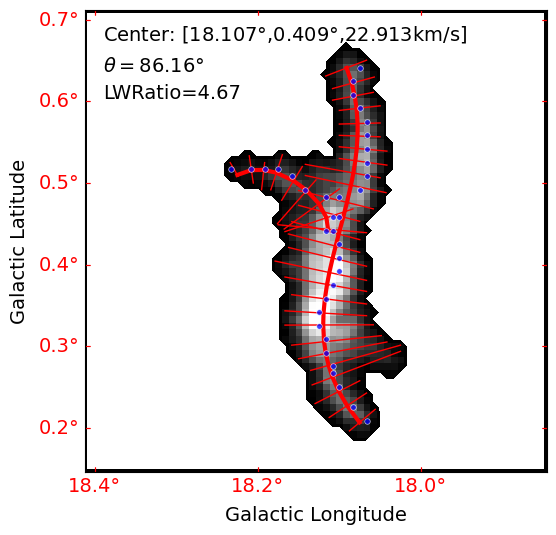

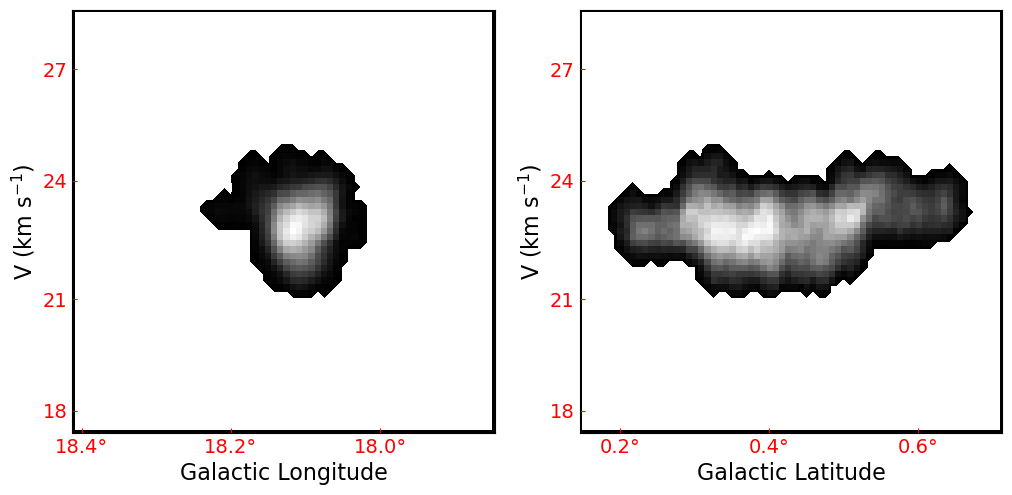

In [31]:
save_path = '../Images/{}_{}'.format(line_name,ShowId)
dictionary_cuts = defaultdict(list)
dictionary_cuts = filamentObj.Get_Item_Dictionary_Cuts(filament_clumps_id,dictionary_cuts,SampInt,Substructure)
Plot_and_Save_Funs.Plot_Filament_Item(filamentObj,figsize=(8,6),fontsize=14,spacing=12*u.arcmin,save_path=None)

save_path = '../Images/{}_{}_PV_Integrated'.format(line_name,ShowId)
Plot_and_Save_Funs.Plot_PV_Integrate(filamentObj,figsize=(12,8),fontsize=16,spacing=[0.2,0.2,None],save_path=None)

The skeletons of each substructure.

In [38]:
for skeleton_id,skeleton_coords in enumerate(filamentObj.skeleton_coords_record):
    print('Substructure {} skeleton length:'.format(skeleton_id+1),len(skeleton_coords))

Substructure 1 skeleton length: 57
Substructure 2 skeleton length: 18


Plot the skeleton, profile, and PV diagram of each filament by a sloop. Please pay attention to the location of `dictionary_cuts = defaultdict(list)`, which store the information about the profiles.

show_id: 3


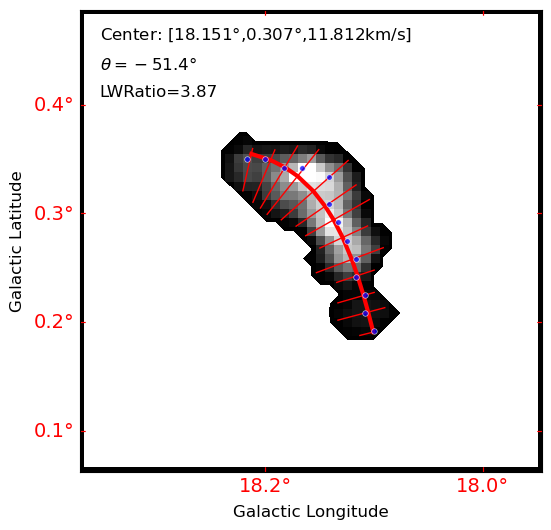

show_id: 4


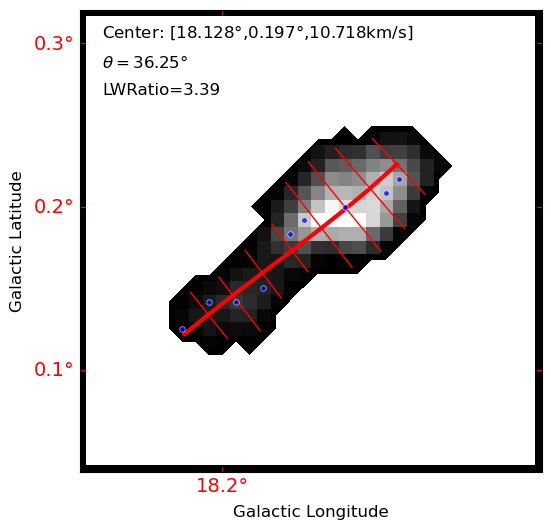

show_id: 22


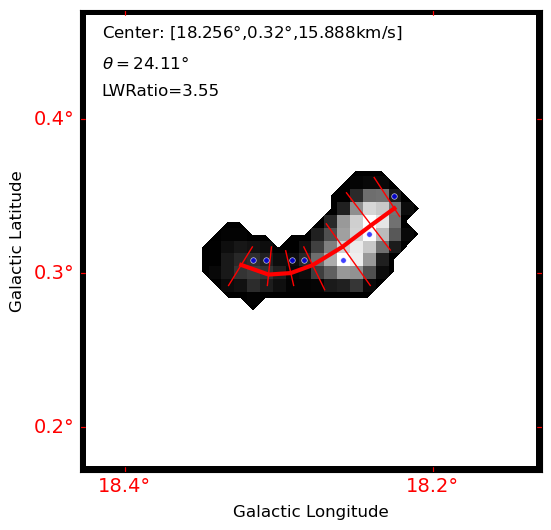

show_id: 30


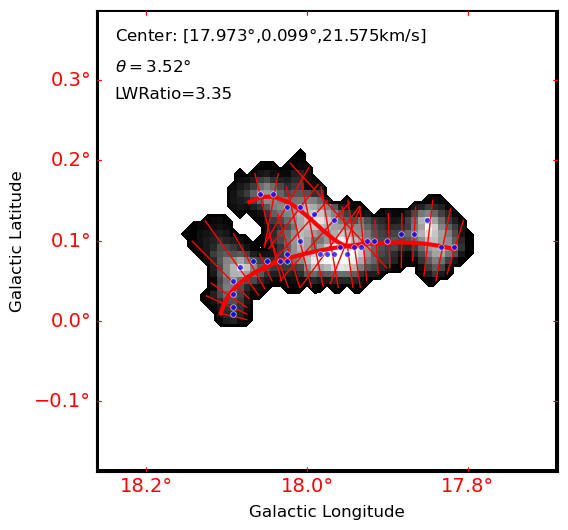

show_id: 34


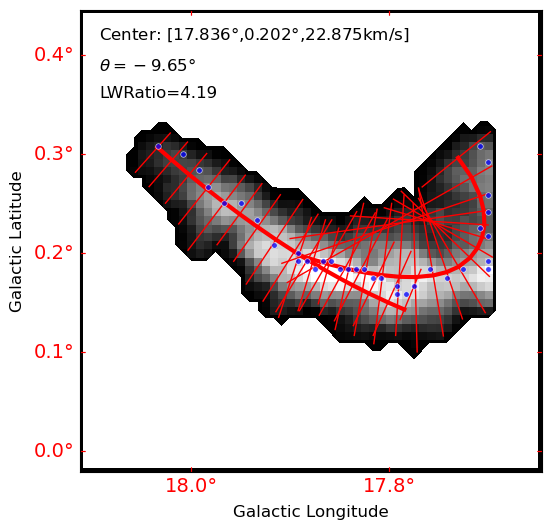

show_id: 50


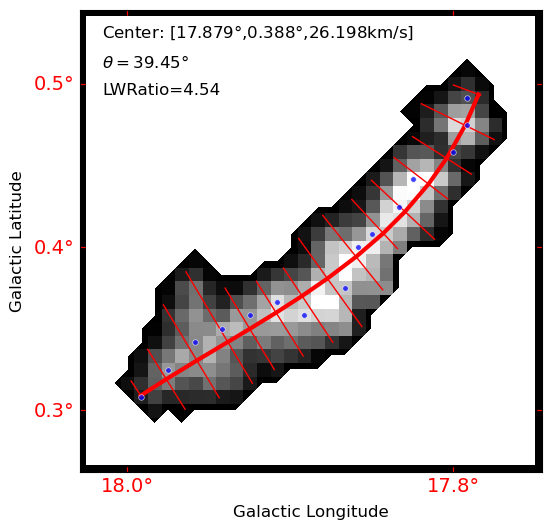

show_id: 59


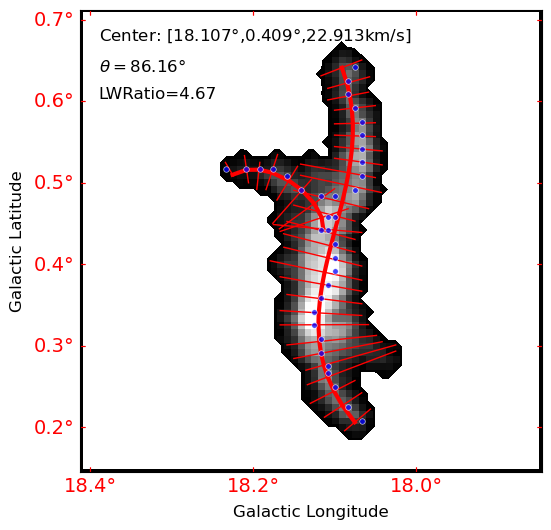

show_id: 90


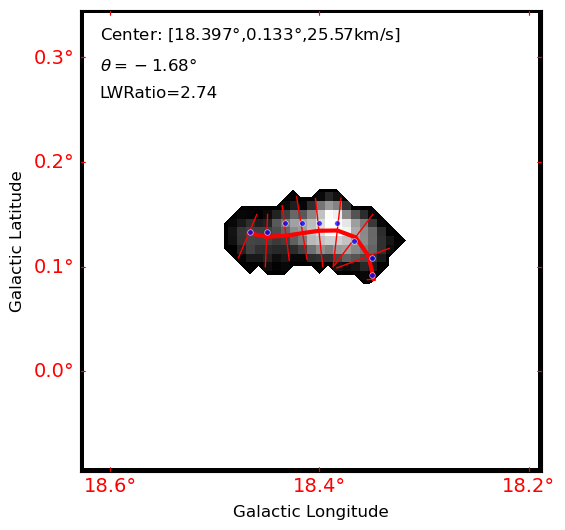

show_id: 106


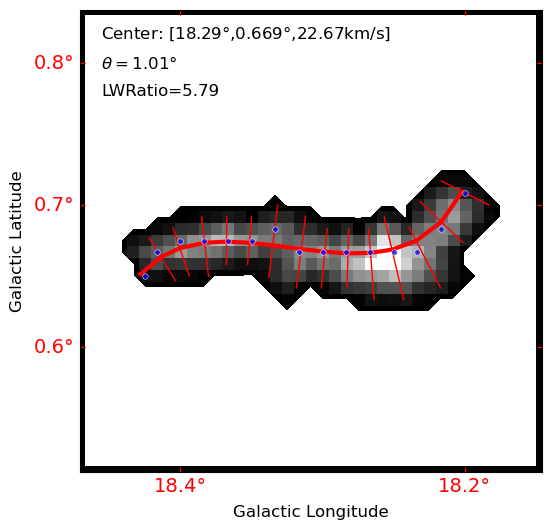

In [22]:
for show_id in related_ids.keys():
    print('show_id:',show_id)
    filament_clumps_id = related_ids[show_id]
#     print('length:',len(filament_clumps_id))
    filamentObj.Filament_Infor_I(filament_clumps_id)
    
    dictionary_cuts = defaultdict(list)
    dictionary_cuts = filamentObj.Get_Item_Dictionary_Cuts(filament_clumps_id,dictionary_cuts,SampInt,Substructure)
    
    save_path = '../Images/{}_{}'.format(line_name,show_id)
    Plot_and_Save_Funs.Plot_Filament_Item(filamentObj,figsize=(8,6),fontsize=12,spacing=12*u.arcmin,save_path=None)
    
    save_path = '../Images/{}_{}_PV_Integrated'.format(line_name,show_id)
#     Plot_and_Save_Funs.Plot_PV_Integrate(filamentObj,figsize=(12,8),fontsize=12,spacing=[0.2,0.2,None],save_path=None)

Plot all the fitted skeletons of filaments in a figure. 

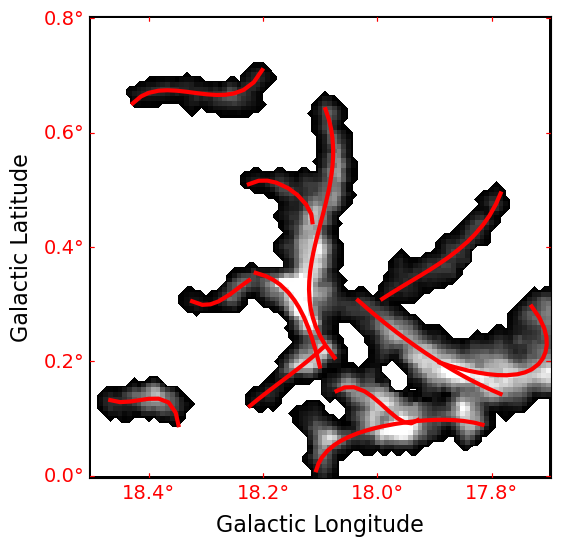

In [23]:
save_path = '../Images/{}_Total'.format(line_name)

dictionary_cuts = defaultdict(list)
for show_id in related_ids.keys():
    filament_clumps_id = related_ids[show_id]
    filamentObj.Filament_Infor_I(filament_clumps_id)
    dictionary_cuts = filamentObj.Get_Item_Dictionary_Cuts(filament_clumps_id,dictionary_cuts,SampInt,Substructure)
    
Plot_and_Save_Funs.Plot_Filament(filamentObj,figsize=(8,6),fontsize=16,spacing=12*u.arcmin,save_path=None)

Plot the velocity map of an example filament.

In [24]:
ShowId = 59

filament_clumps_id = related_ids[ShowId]
filamentObj.Filament_Infor_I(filament_clumps_id)


filament_data = filamentObj.filament_data
# data_wcs = filamentObj.clumpsObj.data_wcs
data_wcs_item = filamentObj.data_wcs_item
velocity_map = filamentObj.velocity_map_item
# start_coords = filamentObj.start_coords
filament_item = filamentObj.filament_item

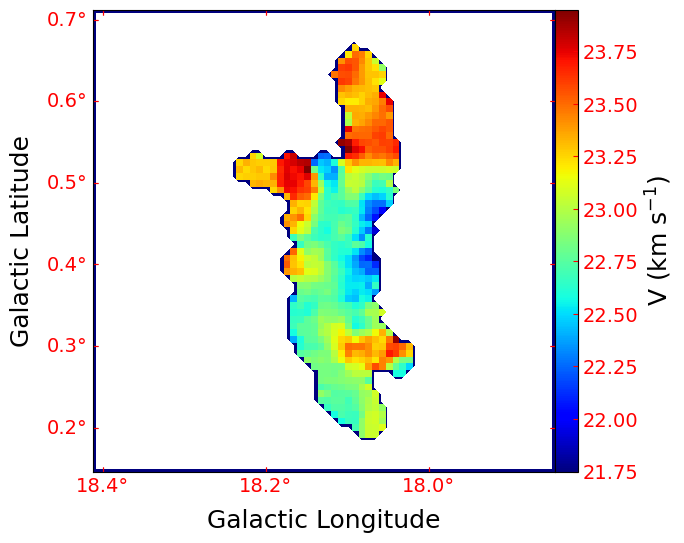

In [25]:
fig = plt.figure(figsize=(8,6))
ax0 = fig.add_subplot(111,projection=data_wcs_item.celestial)

vmin = velocity_map[np.where(velocity_map!=0)].min()
vmax = velocity_map.max()

gci = ax0.imshow(velocity_map, cmap='jet', vmin=vmin, vmax=vmax)
ax0.contourf(velocity_map,
             levels = [-1, 1],
             colors = 'w')

# xmin, xmax = start_coords[2], start_coords[2]+filament_item.shape[2]
# ymin, ymax = start_coords[1], start_coords[1]+filament_item.shape[1]
# ax0.set_xlim(max(0., xmin-.1*(xmax-xmin)), min(filament_data.shape[2]-1, xmax+.1*(xmax-xmin)))
# ax0.set_ylim(max(0., ymin-.1*(ymax-ymin)), min(filament_data.shape[1]-1, ymax+.1*(ymax-ymin)))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'

plt.xlabel("Galactic Longitude")
plt.ylabel("Galactic Latitude")
lon = ax0.coords[0]
lat = ax0.coords[1]
lon.set_major_formatter("d.d")
lat.set_major_formatter("d.d")
lon.set_ticks(spacing=12 * u.arcmin)
# plt.xlim(coords[2].min()-3,coords[2].max()+3)
# plt.ylim(coords[1].min()-3,coords[1].max()+3)
cbar = plt.colorbar(gci,pad=0)
cbar.set_label('V (km s$^{-1}$)')
plt.show()

## DPConCFil: Sub-methods

Please see the article DPConCFil for more detail description about the sub-methods.

### The Consistency-based Identification Method

#### Filaments Without LWRatio Judgement: Faster

In [26]:
filamentObj_indentify_1 = FilamentInfor(clumpsObj,parameters_DPConCFil)

filamentObj_indentify_1.Filament_Clumps_Relation()
related_center = filamentObj_indentify_1.related_ids
print('Filament Keys Without LBRatio Judgement:',list(related_ids.keys()))

100%|██████████| 39/39 [00:00<00:00, 519.95it/s]

Filament Keys Without LBRatio Judgement: [3, 4, 22, 30, 34, 50, 59, 90, 106]


#### Filaments With LWRatio Judgement: Slower

In [27]:
SkeletonType = 'Intensity'
filamentObj_indentify_2 = FilamentInfor(clumpsObj,parameters_DPConCFil,SkeletonType=SkeletonType)
filament_infor_all = filamentObj_indentify_2.Filament_Infor_All()
related_ids = filamentObj_indentify_2.related_ids

print('Filament Keys:',list(related_ids.keys()))

100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

Filament Keys: [3, 4, 22, 30, 34, 50, 59, 90, 106]


To provide the foundational data for subsequent examples, we obtain the information of the filament with the keyword 59.

In [28]:
ShowId = 59

filament_clumps_id = related_ids[ShowId]
filamentObj.Filament_Infor_I(filament_clumps_id)

### The Skeleton of Filament

This sub-methond is based on the velocity-integrated map `fil_image` and spatial mask `fil_mask`. The funs are in module FCFA.

In [29]:
fil_image = filamentObj.filament_item.sum(0)
fil_mask = filamentObj.filament_item_mask_2D.astype('bool')

#### The Morphology-based Skeletonization Method: Morphology Skeleton

In [30]:
skeleton_coords_2D_Morphology,filament_skeleton,all_skeleton_coords = FCFA.Get_Single_Filament_Skeleton(fil_mask)

#### The Graph-based Skeletonization Method: Intensity Skeleton

In [31]:
skeleton_coords_2D_Intensity,small_sc = FCFA.Get_Single_Filament_Skeleton_Weighted(fil_image,fil_mask,filamentObj.clumps_number)

Plot the skeletons. 

Left: All of the morphology skeleton. 

Middle: The one longest morphology skeleton. 

Right: The intensity skeleton.

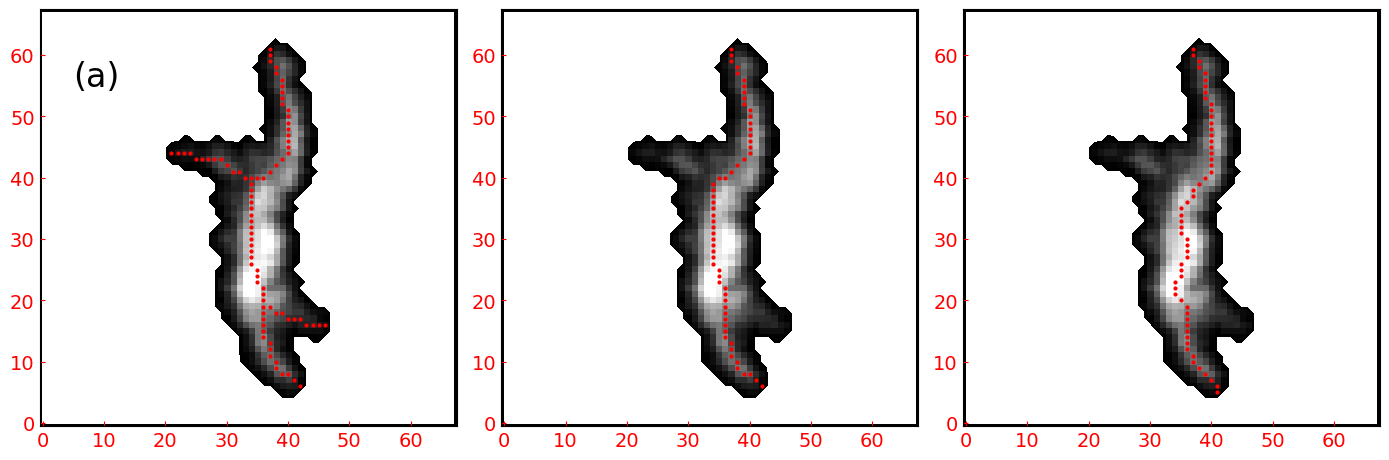

In [32]:
fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(14, 16))
skeleton_coords_2D = all_skeleton_coords
for i in range(len(skeleton_coords_2D)):
    ax0.plot(skeleton_coords_2D[i][1],skeleton_coords_2D[i][0],color='r',marker='.',markersize=4)
vmin, vmax = np.min(fil_image[np.where(fil_image!=0)]), np.nanpercentile(fil_image[np.where(fil_image!=0)], 98.)
ax0.imshow(fil_image,
           origin='lower',
           cmap='gray',
           interpolation='none',
           norm = colors.Normalize(vmin = vmin, vmax =  vmax))
ax0.contourf(fil_image,
             levels = [0., .01],
             colors = 'w')

skeleton_coords_2D = skeleton_coords_2D_Morphology
for i in range(len(skeleton_coords_2D)):
    ax1.plot(skeleton_coords_2D[i][1],skeleton_coords_2D[i][0],color='r',marker='.',markersize=4)
#     ax1.text(skeleton_coords_2D[i][1],skeleton_coords_2D[i][0],'{}'.format(i),color='gold')

ax1.imshow(fil_image,
           origin='lower',
           cmap='gray',
           interpolation='none',
           norm = colors.Normalize(vmin = vmin, vmax =  vmax))
ax1.contourf(fil_image,
             levels = [0., .01],
             colors = 'w')

skeleton_coords_2D = skeleton_coords_2D_Intensity
for i in range(len(skeleton_coords_2D)):
    ax2.plot(skeleton_coords_2D[i][1],skeleton_coords_2D[i][0],color='r',marker='.',markersize=4)
    
ax2.imshow(fil_image,
           origin='lower',
           cmap='gray',
           interpolation='none',
           norm = colors.Normalize(vmin = vmin, vmax =  vmax))
ax2.contourf(fil_image,
             levels = [0., .01],
             colors = 'w')

ax0.text(5,55,'(a)',color='black',fontsize=24)
fig.tight_layout()
# plt.xticks([]),plt.yticks([])
# plt.savefig('../Images/Filament_Skeleton_Morphology.png', format='png', dpi=1000)
plt.show()

### The Graph-based Sub-structuring Method

This sub-methond is based on the clump centers `centers `, the original data `origin_data`, the regional data `regions_data`, the connected relations among clumps `connected_ids_dict`, the coordinates of each clump `clump_coords_dict`, and the clump ids `filament_clumps_id ` of a filament. The other parameters is used to build the profiles.

See the function `Get_Item_Dictionary_Cuts` for more details about how to obtain `substructure_ids`. Recommend constructing the clump class first.

In [32]:
filamentObj_substructure = FilamentInfor(filamentObj.clumpsObj,SkeletonType)
filamentObj_substructure.SkeletonType = 'Intensity'

filamentObj_substructure.clumpsObj = filamentObj.clumpsObj
filamentObj_substructure.clumpsObj.centers = filamentObj.clumpsObj.centers
filamentObj_substructure.clumpsObj.origin_data = filamentObj.clumpsObj.origin_data
filamentObj_substructure.clumpsObj.regions_data = filamentObj.clumpsObj.regions_data
filamentObj_substructure.clumpsObj.connected_ids_dict = filamentObj.clumpsObj.connected_ids_dict
filamentObj_substructure.clumpsObj.clump_coords_dict = filamentObj.clumpsObj.clump_coords_dict

filamentObj_substructure.filament_data = filamentObj.filament_data
filamentObj_substructure.filament_mask_2D = filamentObj.filament_item_mask_2D
filamentObj_substructure.filament_coords = filamentObj.filament_coords


dictionary_cuts = defaultdict(list)
Substructure = True

filamentObj_substructure.Get_Item_Dictionary_Cuts(filament_clumps_id,dictionary_cuts=dictionary_cuts,Substructure=Substructure)

print('Substructure Ids:',filamentObj_substructure.substructure_ids[0])

Substructure Ids: [[61, 59, 60, 62, 63], [64, 60]]


Plot the substructures.

Corresponding relationship: [1: 61, 2: 59, 3: 60, 4: 62, 5: 64, 6: 63].

In [33]:
filament_item = filamentObj.filament_item
start_coords = filamentObj.start_coords
fil_image = filamentObj.filament_data.sum(0)
centers = filamentObj_substructure.clumpsObj.centers
substructure_ids = filamentObj_substructure.substructure_ids[0]

substructure_ids_T = []
clump_centers_LB = []
for substructure_ids_i in substructure_ids:
    substructure_ids_T += substructure_ids_i
substructure_ids_T = list(set(substructure_ids_T))
for substructure_id in substructure_ids_T:
    clump_centers_LB.append([centers[substructure_id][1],centers[substructure_id][2]])
    
print('substructure_ids_T:',substructure_ids_T)

substructure_ids_T: [64, 59, 60, 61, 62, 63]


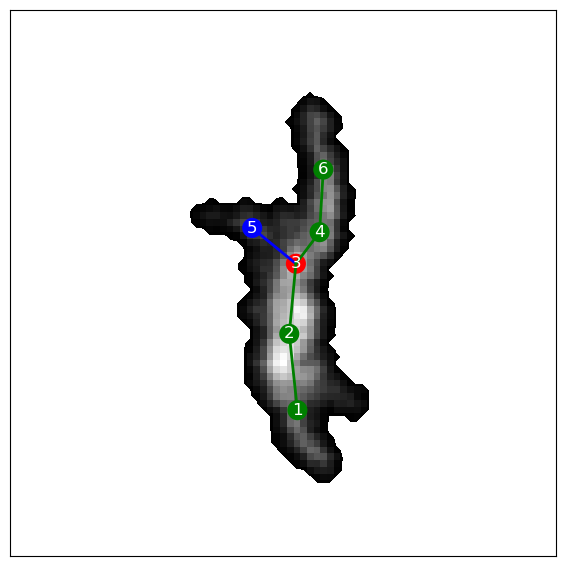

In [34]:
number = 0
circle_radius = 1.5
number_labels = [5,2,3,1,4,6] 
node_colors = ['blue','green','red','green','green','green']

fig, ax0 = plt.subplots(1,1,figsize=(8, 6))
ax0.plot([clump_centers_LB[0][1],clump_centers_LB[2][1]], [clump_centers_LB[0][0],clump_centers_LB[2][0]],\
         'blue', label='fit', lw=2, alpha=1.0, markersize = 8.)
ax0.plot([clump_centers_LB[1][1],clump_centers_LB[3][1]], [clump_centers_LB[1][0],clump_centers_LB[3][0]],\
         'green', label='fit', lw=2, alpha=1.0, markersize = 8.)
ax0.plot([clump_centers_LB[1][1],clump_centers_LB[2][1]], [clump_centers_LB[1][0],clump_centers_LB[2][0]],\
         'green', label='fit', lw=2, alpha=1.0, markersize = 8.)
ax0.plot([clump_centers_LB[2][1],clump_centers_LB[4][1]], [clump_centers_LB[2][0],clump_centers_LB[4][0]],\
         'green', label='fit', lw=2, alpha=1.0, markersize = 8.)

ax0.plot([clump_centers_LB[4][1],clump_centers_LB[5][1]], [clump_centers_LB[4][0],clump_centers_LB[5][0]],\
         'green', label='fit', lw=2, alpha=1.0, markersize = 8.)

for index in filament_clumps_id:
    center_x = centers[index][1]
    center_y = centers[index][2]
    circle = patches.Circle((center_y, center_x), circle_radius, facecolor=node_colors[number])
    ax0.add_patch(circle)
    ax0.text(center_y, center_x, "{}".format(number_labels[number]), fontsize=12, color='white', va='center', ha='center')
    number += 1

xmin, xmax = start_coords[2], start_coords[2]+filament_item.shape[2]
ymin, ymax = start_coords[1], start_coords[1]+filament_item.shape[1]
ax0.set_xlim(max(0., xmin-.1*(xmax-xmin)), min(fil_image.shape[0]-1, xmax+.1*(xmax-xmin)))
ax0.set_ylim(max(0., ymin-.1*(ymax-ymin)), min(fil_image.shape[1]-1, ymax+.1*(ymax-ymin)))

ax0.imshow(fil_image,
           origin='lower',
           cmap='gray',
           interpolation='none')
ax0.contourf(fil_image,
             levels = [0., .1],
             colors = 'w')
fig.tight_layout()
plt.xticks([]),plt.yticks([])
# plt.savefig('../Images/Skeleton_Sub_Graph.pdf', format='pdf', dpi=1000)
plt.show()

To provide the foundational data for subsequent examples, it need to obtain the information of the filament with the keyword 60.

In [43]:
ShowId = 59
SampInt = 2
Substructure = False

filament_clumps_id = related_ids[ShowId]
filamentObj.Filament_Infor_I(filament_clumps_id)

dictionary_cuts = defaultdict(list)
dictionary_cuts = filamentObj.Get_Item_Dictionary_Cuts(filament_clumps_id,dictionary_cuts,SampInt,Substructure)

## Profile Analysis

### The mean profile and the IOU of the profiles

**EProfileTime,EProfileLen**: The coefficient of used to calculate the effective profile length and the possible minimum effective profile length. 

$$\rm EProfileLen_{max} = mean(profiles)+EProfileTime*\frac{mean(profiles)+std(profiles)}{std(profiles)}$$

$$\rm EProfileLen_{min} = max(mean(profiles)-EProfileTime*\frac{mean(profiles)+std(profiles)}{std(profiles)},EProfileLen)$$

If the length of a profile is not in $[EProfileLen_{min},EProfileLen_{max}]$, it will be removed. This is used to filter out abnormal profiles.

Default and example values of EProfileTime: 3, [1,2,3]

**ExtendRange**: Extend range. The number of data points where the average profile value is 0 at both ends. This is for the plots.

**MeanProfile**: `MeanProfile=True` means that calculate the SIOU of the mean profile. `MeanProfile=False` means that calculate the SIOU of each profile, and then calculate the average of the SIOUs.

In [44]:
EProfileTime = 3
EProfileLen = 6
ExtendRange = 20
MeanProfile = True

In [45]:
Profile_Funs.Cal_Mean_Profile(filamentObj,EProfileTime,EProfileLen,ExtendRange)
Profile_Funs.Cal_Profile_IOU(filamentObj,MeanProfile)

profile_IOU = filamentObj.profile_IOU
print('MaxProfileLen:',filamentObj.MaxProfileLen)
print('MinProfileLen:',filamentObj.MinProfileLen)
print('profile_IOU:',profile_IOU)

MaxProfileLen: 20.98
MinProfileLen: 6.0
profile_IOU: 0.68


Plot the profile of each cut and the mean profile. The gray lines are the profiles, the red line is the average line of all profiles, and the blue line is the reflection of the left average line along the dashed symmetry axis.

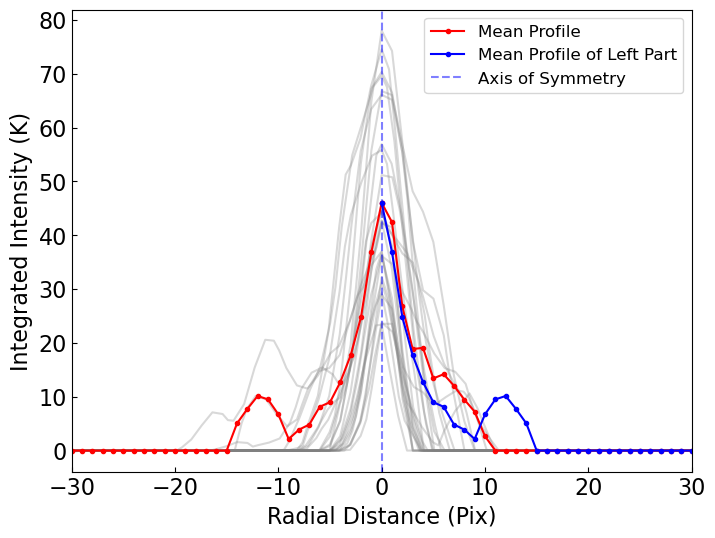

In [46]:
Plot_and_Save_Funs.Plot_Filament_Profile(filamentObj,xlims=(-30,30))

### The fitted profile 

Fit the profile via the [RadFil package](https://github.com/catherinezucker/radfil). 



`RadFil` comes with two built in models for fitting: a Plummer-like model and a Gaussian model. The Plummer-like model taken is from Cox et al. (2016) and parameterized as:

 $$\rm N(r) = \frac{N_0}{[{1+{(\frac{r}{R_{flat}})^2}]}^{\; \frac{p-1}{2}}}$$
 
where $\rm N_0$ is the amplitude, p is the power index, and $\rm R_{flat}$ is the inner flattening radius. 

The Gaussian model is a standard Gaussian:

$$\rm N(r)=a \times \exp{[\frac{-{(r-\mu)}^2}{2\sigma^2}]}$$

where a is the amplitude, $\sigma$ is the standard deviation, and $\mu$ is the mean. 

`RadFil` has methods for *Background Subtraction Prior to Profile Fitting* and *Uncertainties in Best-Fit Parameter Values*. Please see the introduction of [RadFil](https://github.com/catherinezucker/radfil/blob/master/RadFil_Tutorial.ipynb) for more details.

Construct radObj in filamentObj. We can obtain the `radObj` class using `filamentObj.radObj`. From there, we have the flexibility to reconstruct the class according to our requirements.

In [47]:
Profile_Funs.Construct_radObj(filamentObj)

Fit the profile by `Profile_Funs.Fit_Profile`. 

**FitFunc**: The fitting model, Plummer-like or Gaussian.

**FitDist**: The range used to fit. If FitDist=None, the range is the maximum range of all the profiles. 

Example value: 20, [-10,20]

**FitMeanProfile**: Choose to fit the mean profile `FitMeanProfile=True` or all the profiles `FitMeanProfile=False`. If `FitMeanProfile` is set to True, the `ExtendRange` should be set to 1 in order to obtain stable fitting parameters. If `FitMeanProfile` is set to False, the `FitFunc = 'Plummer'` may fail to fit in same case. 

**BGDist, BGDegree**: The background fitting parameters. As our filament data is already masked, we do not need to perform background fitting. 

**BeamWidth**: The beam width. It is used to calculate the deconvolved FWHM by formula $FWHM_{deconv}=\sqrt{FWHM^2 - HPBW^2}$.

==== Plummer-like ====
amplitude: 4.597E+01
p: 2.154
R_flat: -1.590
The statistical uncertainty on the best-fit amplitude is 2.487
The statistical uncertainty on the best-fit powerIndex is 0.284
The statistical uncertainty on the best-fit flatteningRadius is 0.445
==== Gaussian ====
amplitude: 4.037E+01
mean: 0.000
width: 2.663
The statistical uncertainty on the best-fit amplitude is 1.699
The statistical uncertainty on the best-fit mean is 0.154


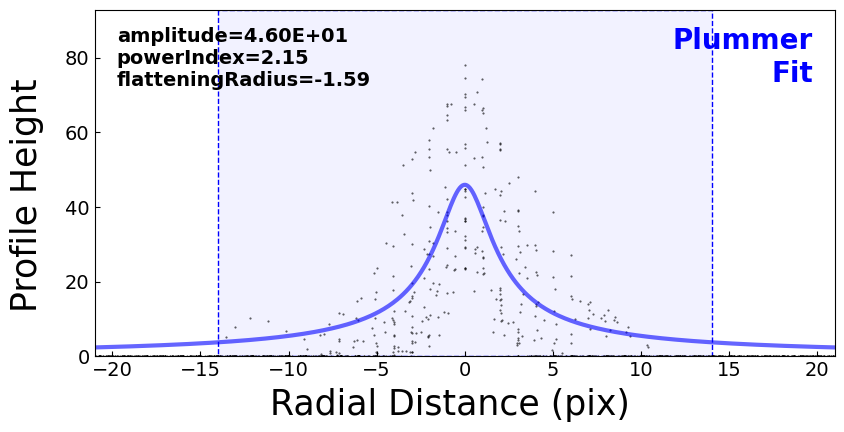

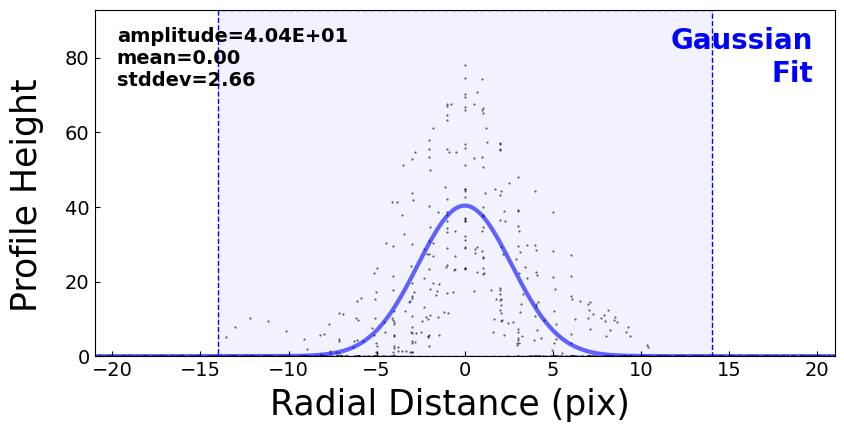

In [48]:
FitFunc = 'Plummer' #Plummer,Gaussian
FitDist = None
FitMeanProfile = False
BGDist = None
BGDegree = 0
BeamWidth = None

for FitFunc in ['Plummer','Gaussian']:
    Profile_Funs.Fit_Profile(filamentObj,FitFunc,FitDist,FitMeanProfile,BGDist,BGDegree,BeamWidth)
#     print('PowerIndex:',np.around(filamentObj.radObj.profilefit.powerIndex.value,2))
    for (name,error) in zip(filamentObj.radObj.profilefit.param_names,filamentObj.radObj.std_error): 
        print("The statistical uncertainty on the best-fit {} is {}".format(name,np.around(error,3)))

Plot the fited profiles and parameters.

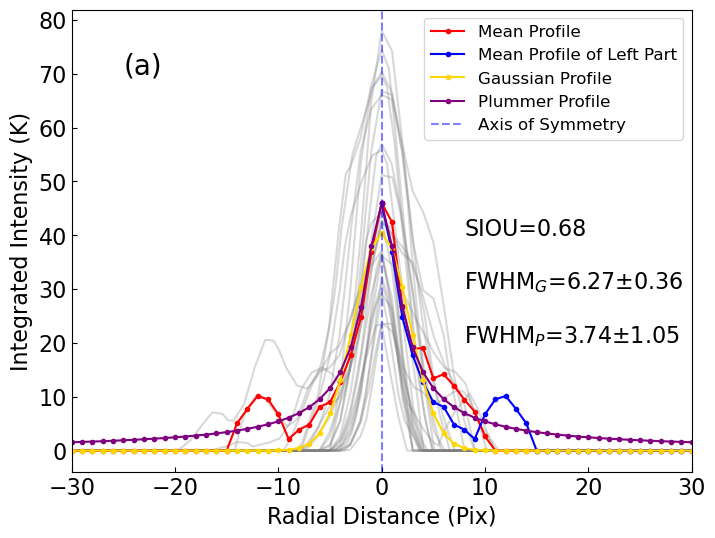

In [49]:
fontsize = 16
dictionary_cuts = filamentObj.dictionary_cuts

fig,(ax0)= plt.subplots(1,1, figsize=(8, 6))
for i in range(0,len(dictionary_cuts['distance'])):
    dists_i = dictionary_cuts['distance'][i][np.where(dictionary_cuts['profile'][i]!=0)]
    delta_dist = dists_i[-1]-dists_i[0]
    if delta_dist>filamentObj.EProfileLen:
        ax0.plot(dictionary_cuts['distance'][i], dictionary_cuts['profile'][i],c='gray',alpha=0.3)

ax0.plot(filamentObj.axis_coords_left, filamentObj.mean_profile_left,c='r',marker='.',alpha=1,label='Mean Profile')
ax0.plot(filamentObj.axis_coords_right, filamentObj.mean_profile_right,c='r',marker='.',alpha=1)
ax0.plot(filamentObj.axis_coords_right, filamentObj.mean_profile_left_r,c='b',marker='.',alpha=1,label='Mean Profile of Left Part')
ax0.plot(filamentObj.axis_coords, filamentObj.profile_fited_G,c='gold',marker='.',alpha=1,label='Gaussian Profile')
ax0.plot(filamentObj.axis_coords, filamentObj.profile_fited_P,c='purple',marker='.',alpha=1,label='Plummer Profile')

ax0.axvline(0, color='b', linestyle='dashed',alpha=0.5,label='Axis of Symmetry')
ax0.text(-25,70,'(a)',color='black',fontsize=fontsize+4)
ax0.text(8,40,'SIOU={}'.format(filamentObj.profile_IOU),color='black',fontsize=fontsize)
ax0.text(8,30,'FWHM$_G$={}$\pm${}'.format(filamentObj.FWHM_G,filamentObj.FWHM_error_G),color='black',fontsize=fontsize)
ax0.text(8,20,'FWHM$_P$={}$\pm${}'.format(filamentObj.FWHM_P,filamentObj.FWHM_error_P),color='black',fontsize=fontsize)
plt.xlim(-30,30)
plt.xlabel("Radial Distance (Pix)",fontsize=fontsize)
plt.ylabel(r"Integrated Intensity (K)",fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.legend(fontsize=fontsize-4)
# plt.savefig('../Images/Intensity_Profile_Fited_D6.pdf', format='pdf', dpi=1000)
plt.show()

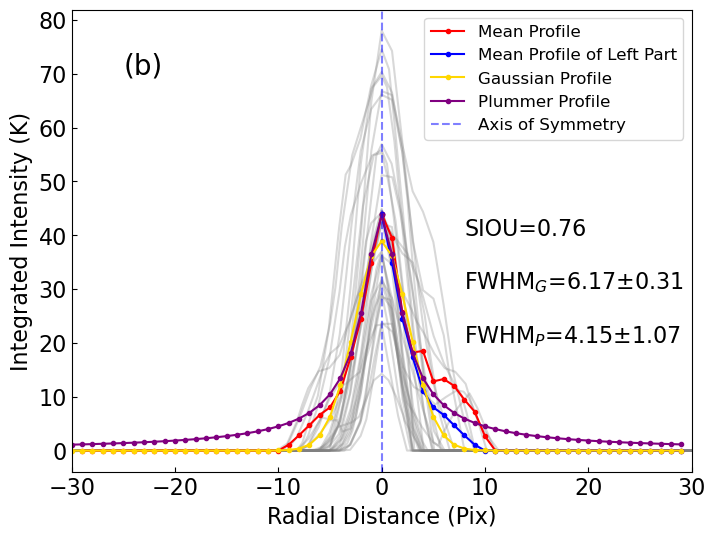

In [42]:
fontsize = 16
dictionary_cuts = filamentObj.dictionary_cuts

fig,(ax0)= plt.subplots(1,1, figsize=(8, 6))
for i in range(0,len(dictionary_cuts['distance'])):
    dists_i = dictionary_cuts['distance'][i][np.where(dictionary_cuts['profile'][i]!=0)]
    delta_dist = dists_i[-1]-dists_i[0]
    if delta_dist>filamentObj.EProfileLen:
        ax0.plot(dictionary_cuts['distance'][i], dictionary_cuts['profile'][i],c='gray',alpha=0.3)

ax0.plot(filamentObj.axis_coords_left, filamentObj.mean_profile_left,c='r',marker='.',alpha=1,label='Mean Profile')
ax0.plot(filamentObj.axis_coords_right, filamentObj.mean_profile_right,c='r',marker='.',alpha=1)
ax0.plot(filamentObj.axis_coords_right, filamentObj.mean_profile_left_r,c='b',marker='.',alpha=1,label='Mean Profile of Left Part')
ax0.plot(filamentObj.axis_coords, filamentObj.profile_fited_G,c='gold',marker='.',alpha=1,label='Gaussian Profile')
ax0.plot(filamentObj.axis_coords, filamentObj.profile_fited_P,c='purple',marker='.',alpha=1,label='Plummer Profile')

ax0.axvline(0, color='b', linestyle='dashed',alpha=0.5,label='Axis of Symmetry')
ax0.text(-25,70,'(b)',color='black',fontsize=fontsize+4)
ax0.text(8,40,'SIOU={}'.format(filamentObj.profile_IOU),color='black',fontsize=fontsize)
ax0.text(8,30,'FWHM$_G$={}$\pm${}'.format(filamentObj.FWHM_G,filamentObj.FWHM_error_G),color='black',fontsize=fontsize)
ax0.text(8,20,'FWHM$_P$={}$\pm${}'.format(filamentObj.FWHM_P,filamentObj.FWHM_error_P),color='black',fontsize=fontsize)
plt.xlim(-30,30)
plt.xlabel("Radial Distance (Pix)",fontsize=fontsize)
plt.ylabel(r"Integrated Intensity (K)",fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.legend(fontsize=fontsize-4)
# plt.savefig('../Images/Intensity_Profile_Fited_D6.pdf', format='pdf', dpi=1000)
plt.show()

### If you have any questions about this manual, please open an issue on github, or email the author. (yujiang@pmo.ac.cn)